# Includes

In [1]:
# importing module
import sys

# appending a path
sys.path.append('../utils')
sys.path.append('../images')

from email.mime import image
from filters import *
from noise import *
from prewitt_filter import PrewittFilter
from sobel_filter import SobelFilter
from robert_filter import RobertFilter
from canny_detector import Canny_detector
import cv2
from histogram import *
from equalization import *
from utils import *
from normalizationOfImage import *
from thresholding import *
from LP_HP_Hybrid import *

# Images to work on 

In [2]:
image_BGR   = cv2.imread("../images/cat256.jpg")
image_RGB   = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image_gray1   = cv2.imread("../images/test.jpeg", cv2.IMREAD_GRAYSCALE)
image_GRAY  = cv2.imread('../images/Brain.png',0)
image_gray  = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
image_LP    = cv2.imread('../images/duck.jpeg',0)
image_HP    = cv2.imread('../images/dog.jpeg',0)
image_color = Image.open("../images/test.jpeg") 

# Noise functions

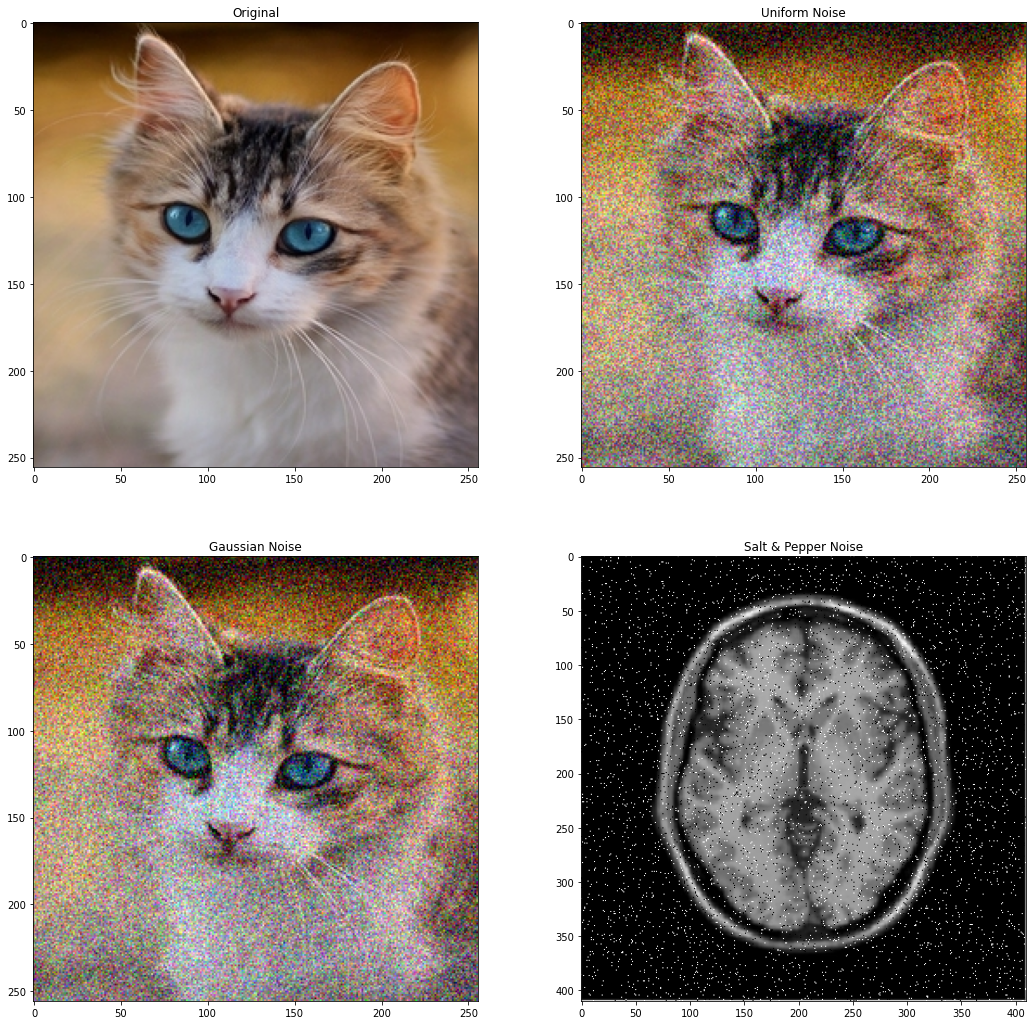

In [3]:
uniform_noise_image = uniform_noise(image_RGB)
gaussian_noise_image = gaussian_noise(image_RGB, 0, 40)
salt_and_pepper_image = salt_pepper_noise(image_GRAY)

# Show results
noise_imgs       = [image_RGB, uniform_noise_image, gaussian_noise_image, salt_and_pepper_image]
noise_labels = ["Original", "Uniform Noise", "Gaussian Noise", "Salt & Pepper Noise"]
generic_imshow_multi(noise_imgs, noise_labels, 2,2)

# Average, Guassian and Median filters

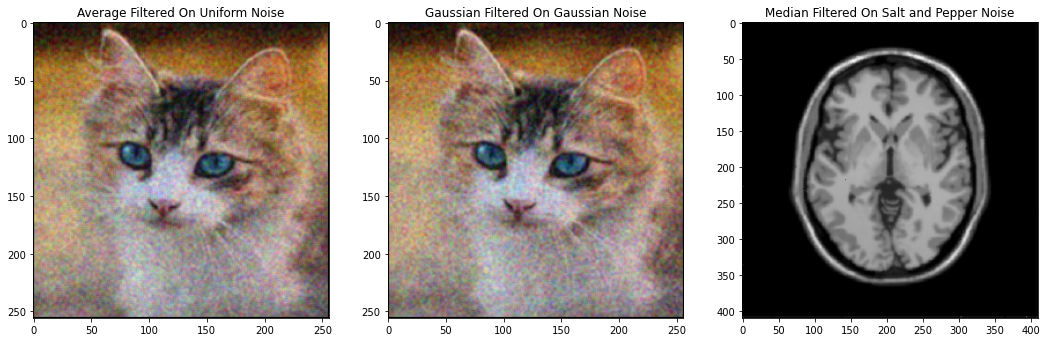

In [4]:
average_filtered_image = average_filter(uniform_noise_image)
gaussian_filtered_image = gaussian_fitler(gaussian_noise_image)
median_filtered_image = median_filter(salt_and_pepper_image)

# Show results
blur_imgs  = [average_filtered_image, gaussian_filtered_image, median_filtered_image] 
blur_label = ["Average Filtered On Uniform Noise", "Gaussian Filtered On Gaussian Noise", "Median Filtered On Salt and Pepper Noise"]
generic_imshow_multi(blur_imgs, blur_label, 3,1)

# Edge detection filters

../utils\utils.py:49: RuntimeWarning: overflow encountered in ubyte_scalars
  result += mat[row+K_row][col+K_col] * kernel[K_row][K_col]


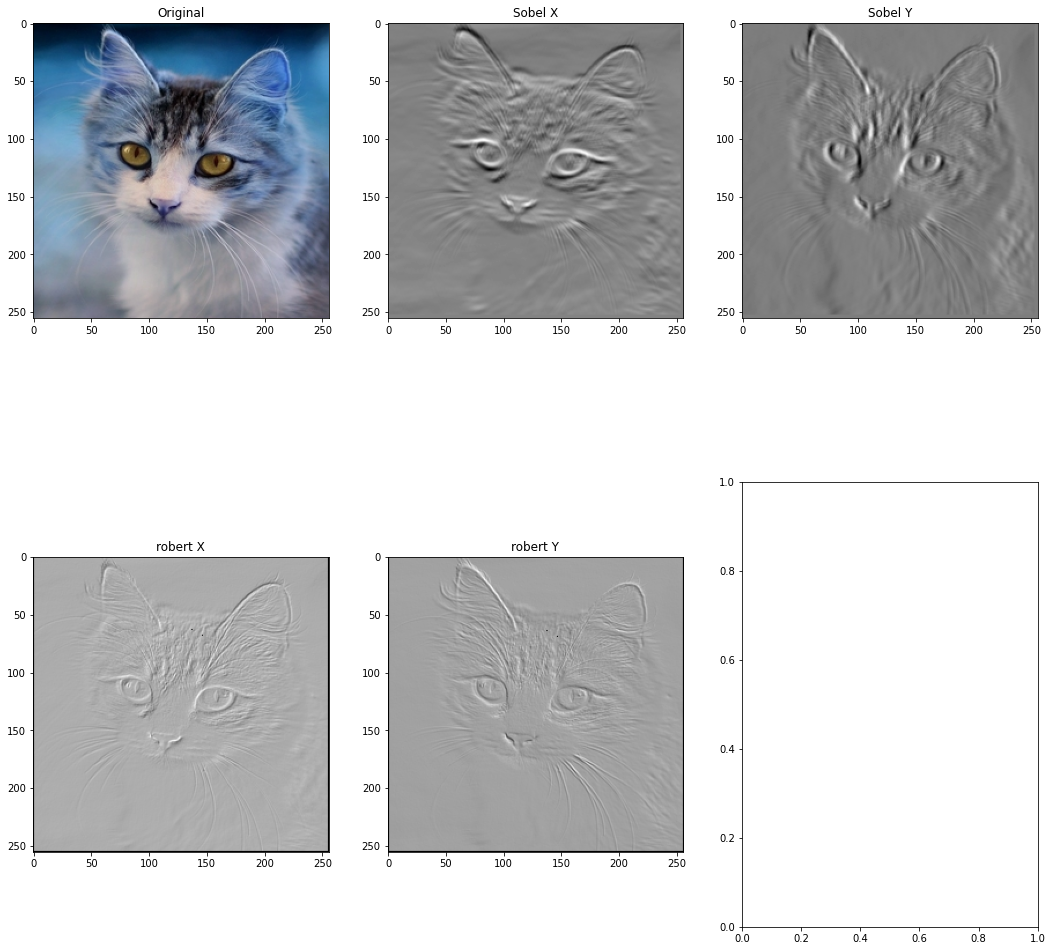

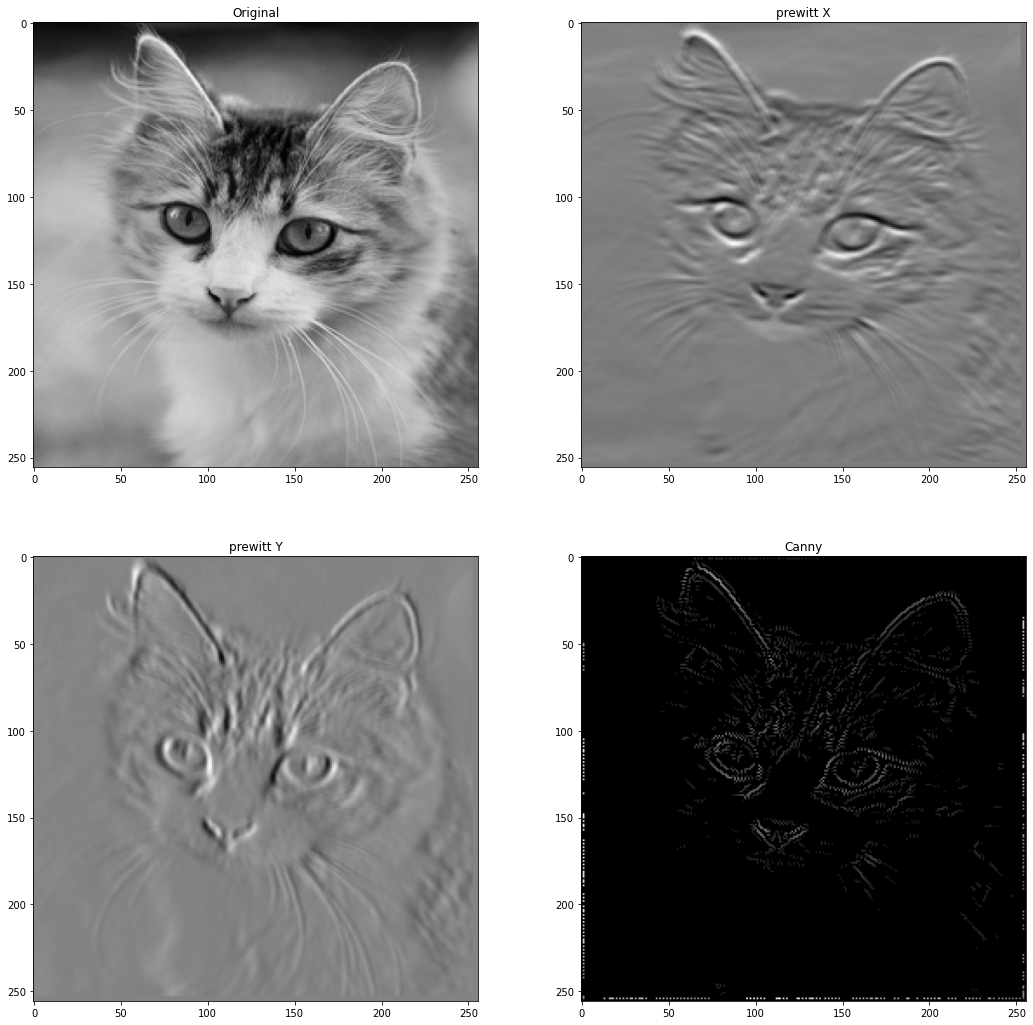

In [5]:
# Sobel
sobelX = SobelFilter(image_BGR,5, kernel_type="x")
sobelY = SobelFilter(image_BGR,5, kernel_type="y")

# Robert
robertX = RobertFilter(image_BGR,2, kernel_type='x')
robertY = RobertFilter(image_BGR,2, kernel_type='y')

# Prewitt
prewittX = PrewittFilter(image_BGR, 5, kernel_type='x')
prewittY = PrewittFilter(image_BGR, 5, kernel_type='y')

# Canny
canny = Canny_detector(image_BGR)

# Show results
edge_detect_img1 = [image_BGR, sobelX, sobelY, robertX, robertY]
edge_detect_labels1 = ["Original", "Sobel X", "Sobel Y", 'robert X', 'robert Y']
generic_imshow_multi(edge_detect_img1, edge_detect_labels1, 3,2)


edge_detect_img2    = [image_gray, prewittX, prewittY, canny]
edge_detect_labels2 = ["Original", 'prewitt X', 'prewitt Y', 'Canny']
generic_imshow_multi(edge_detect_img2, edge_detect_labels2, 2, 2)

# Histogram & Distribution Curve

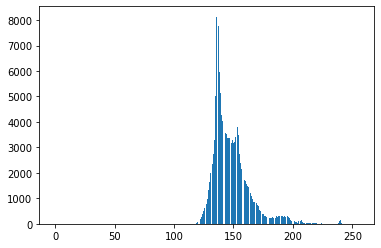

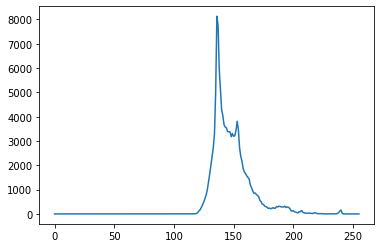

In [6]:
#histogram

image_GRAY = cv2.imread('../images/ex.PNG',0)

histogramplotting = histogram(image_GRAY)
plothist(histogramplotting)

#distribution curve
histogramplotting = histogram(image_GRAY)
plotdist(histogramplotting)

# Image Equalization

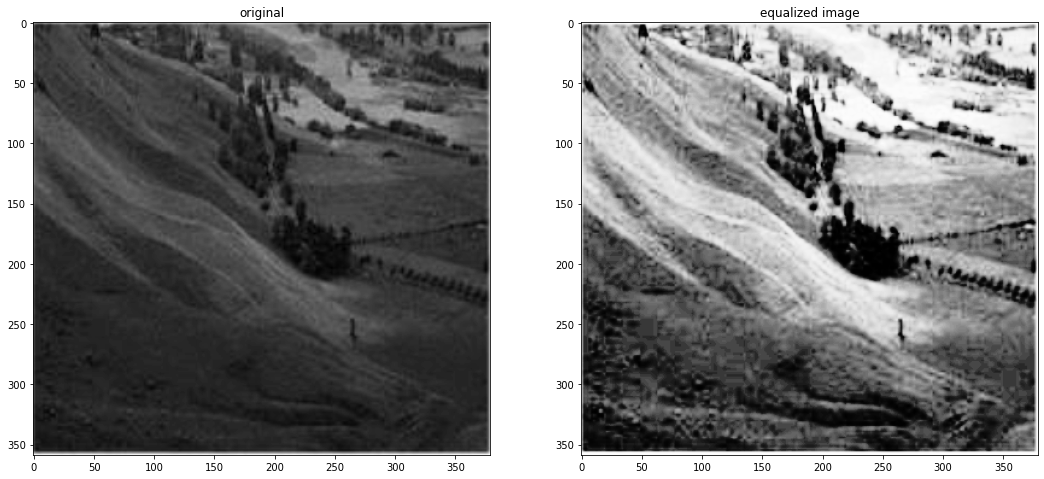

In [7]:
#equalization image
equalized_image = image_equalizing(image_GRAY)
equalized = [image_GRAY,equalized_image]
equalized_labels = ["original","equalized image"]
generic_imshow_multi(equalized, equalized_labels, 2, 1)

# Image Normalization

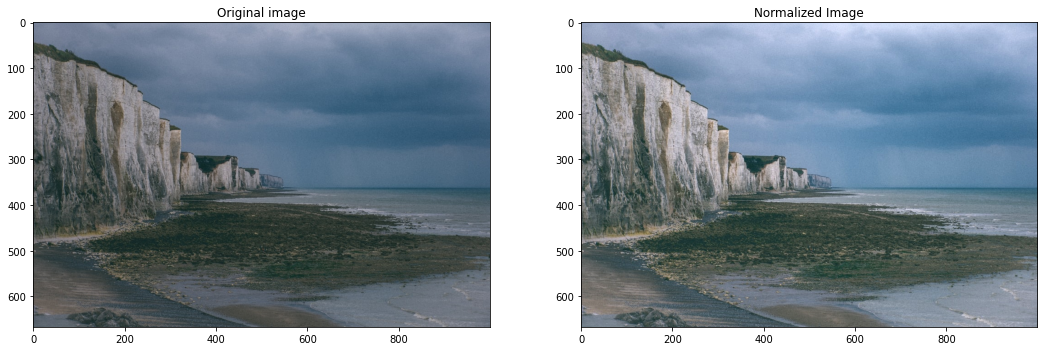

In [8]:
# Normalization
normalized_color_image = normalize_color(image_color)
normalized=[image_color,normalized_color_image]
normalized_labels = ["Original image", "Normalized Image"]
generic_imshow_multi(normalized, normalized_labels, 2, 1)

# Thresholding

c:\Users\User\Desktop\assignment-1-cv-2022-sbe-404-team_06-main\src\thresholding.py:27: RuntimeWarning: overflow encountered in ulonglong_scalars
  sum_ = img[min(row+(c//20), r-1), min(col+(c//20), c-1)]-img[max(row-(c//20), 0), min(col+(c//20), c-1)]-img[min(row+(c//20), r-1), max(col-(c//20), 0)]+img[max(row-(c//20), 0), max(col-(c//20), 0)]


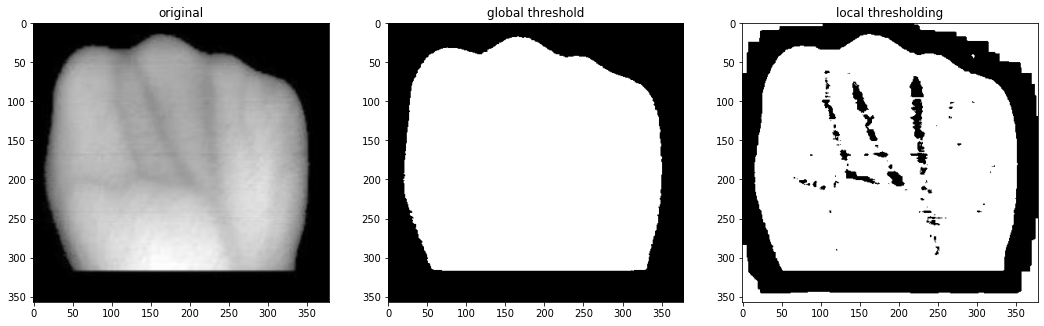

In [9]:
#global thresholding
img = cv2.imread('../images/1.PNG',0)
local_thresholding_img  = local_thresholding(img,4)
global_thresholding_img = Global_thresholding(img,90)

thresholding = [img,global_thresholding_img,local_thresholding_img]
thresholding_labels = ["original","global threshold","local thresholding"]
generic_imshow_multi(thresholding, thresholding_labels, 3, 1)

# Color-Gray image Transformation

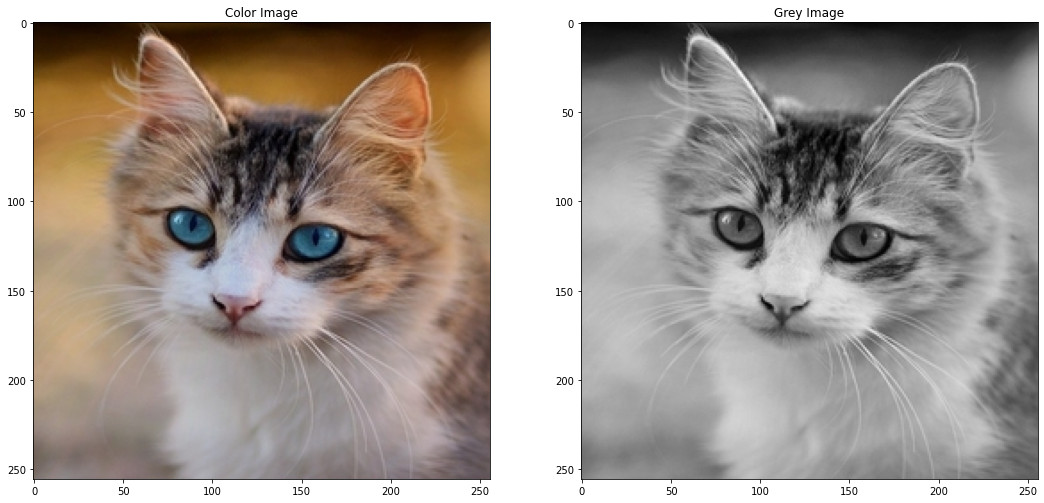

In [10]:
gray = rgb2gray(image_RGB)

color_gray_img = [image_RGB, gray]
gray_color_labels = ['Color Image', 'Grey Image']

generic_imshow_multi(color_gray_img, gray_color_labels, 2, 1)

## Color channels with their histogram

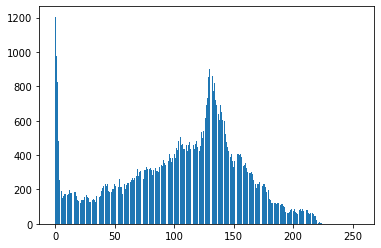

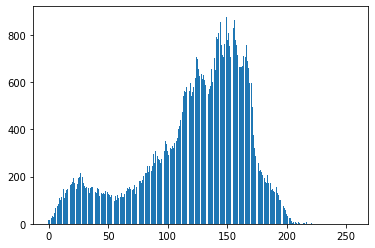

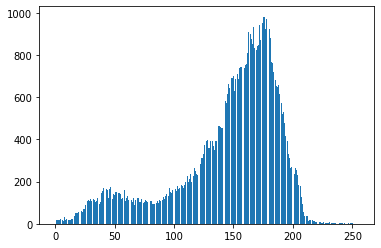

In [11]:
color_img = cv2.imread("../images/cat256.jpg")

# opencv read img as BGR
B, G, R = split_color_channels(color_img)

B_distributions = histogram(B)
plothist(B_distributions)

G_distributions = histogram(G)
plothist(G_distributions)

R_distributions = histogram(R)
plothist(R_distributions)

# Plot Distribution curves for separated channels

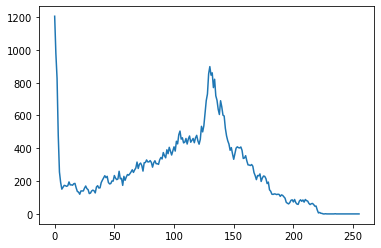

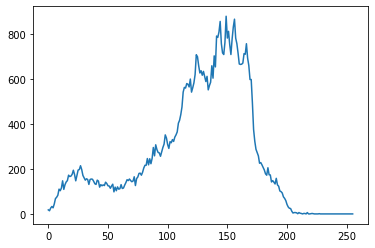

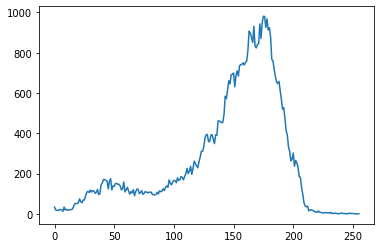

In [12]:
B_distributions = histogram(B)
plotdist(B_distributions)

G_distributions = histogram(G)
plotdist(G_distributions)

R_distributions = histogram(R)
plotdist(R_distributions)

# Frequency Domain Filters & Hybride_Image

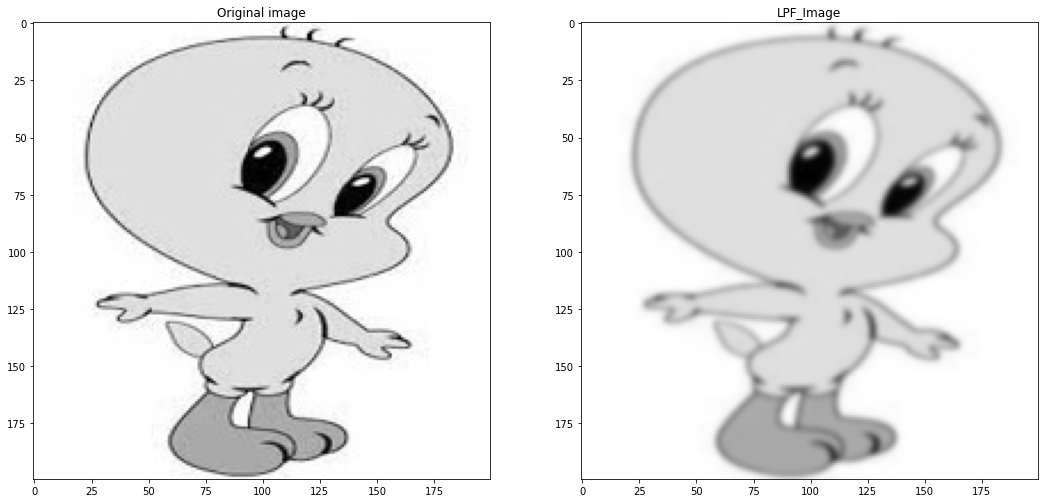

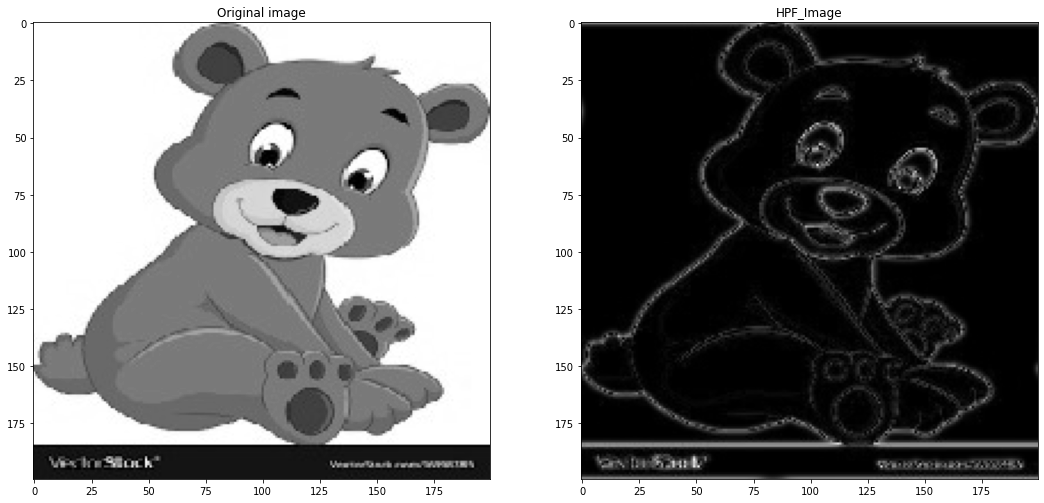

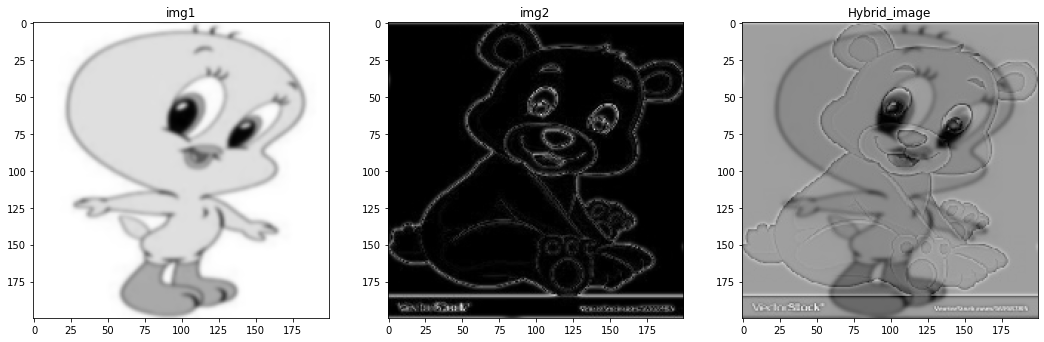

In [13]:
img_of_LPF,img_of_HPF,hyperimage=LPF_HPF_HYPRID(image_LP,image_HP,25)



#low_path_filter
LPF_image=[image_LP,img_of_LPF]
LPfilter_labels = ["Original image", "LPF_Image"]
generic_imshow_multi(LPF_image, LPfilter_labels, 2, 1)


#high_path_filter
HPF_image=[image_HP,img_of_HPF]
HPfilter_labels = ["Original image", "HPF_Image"]
generic_imshow_multi(HPF_image, HPfilter_labels, 2, 1)


#hybrid_image
Hybrid_image=[img_of_LPF,img_of_HPF, hyperimage ]
Hybrid_labels = ["img1", "img2" ,"Hybrid_image"]
generic_imshow_multi(Hybrid_image, Hybrid_labels, 3, 1)

